In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import skew
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer
#os.chdir("/mydir")

Upload the csv files before running code.

In [ ]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [ ]:
df = combined_csv.copy()

In [ ]:
df = df.drop([0])

In [ ]:
df.drop(df.columns[[2,5,6,23,26,27,32]], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#df['建築完成年月'].isnull().sum() = 26278 so there should be at least 70k values
# length is 135598 - 26278 = 109,320 values that aren't null?
#df['建築完成年月'].value_counts() = 9763 unique values
df['建築完成年月'].dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# too many missing values. You can't really impute and say a building has an elevator or not.
# potentially do so for buildings that were built within 10 years, but may not be true
# potentially risky to use this hypothesis
df.drop(['電梯'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.reset_index(drop = True, inplace = True)

Noticed weird behavior in build date, so looked for weird values and will drop those to prevent weird data in analysis

In [ ]:
new_tester = df['建築完成年月']
# look for weird dates in build date
weird = []
for i in range(len(new_tester)):
  if len(new_tester.iloc[i]) < 6:
    weird.append(i)

In [ ]:
# 14 weird values with build date length < 6
# incomprehensible dates so remove
new_tester[weird]

739       05701
10123     06212
15199     05807
25417     07306
28828       030
31795     05305
49683       018
52626     06212
62901       049
66509     05807
73362     04410
80372       031
92530     07002
104807      034
Name: 建築完成年月, dtype: object

In [ ]:
df.drop(weird, axis = 0, inplace=True)

In [ ]:
# reset index so when removing other rows will be more tidy
df.reset_index(drop = True, inplace = True)

In [ ]:
# look for weird spaces (dates shouldn't have spaces here)
# 10148 should be removed
new_tester = df['建築完成年月']
new_tester[new_tester.str.contains(' ') == True]
#new_tester[new_tester.str.contains('076  03') == True]

60776    076  03
Name: 建築完成年月, dtype: object

In [ ]:
df.drop(df[df['建築完成年月'].str.contains('076  03') == True].index, axis = 0, inplace = True)

In [ ]:
# change TW date into normal date format
for i in range(len(df['建築完成年月'])):
  df['建築完成年月'].iloc[i] = str(int(df['建築完成年月'].iloc[i]) + 19110000)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df['建築完成年月'] = pd.to_datetime(df['建築完成年月'])

In [ ]:
df['建築完成年月'] 

0        1992-10-06
1        2017-05-11
2        1999-01-19
3        2016-10-21
4        2016-10-21
            ...    
106895   1998-01-19
106896   1995-08-21
106897   1995-10-30
106898   1981-01-30
106899   1986-05-19
Name: 建築完成年月, Length: 106899, dtype: datetime64[ns]

In [ ]:
# look for weird date patterns in transaction date
# values that are < 6
new_tester = df['交易年月日']
weird = []
for i in range(len(new_tester)):
  if len(new_tester.iloc[i]) < 6:
    weird.append(i)

In [ ]:
df['交易年月日'][weird]

Series([], Name: 交易年月日, dtype: object)

In [ ]:
new_tester[new_tester.str.contains(' ') == True]

Series([], Name: 交易年月日, dtype: object)

In [ ]:
# look for weird 0000 patterns
df['交易年月日'][df['交易年月日'].str.contains('0000') == True]

23140    1090000
Name: 交易年月日, dtype: object

In [ ]:
df.drop(df[df['交易年月日'].str.contains('1090000') == True].index, axis = 0, inplace = True)

In [ ]:
for i in range(len(df['交易年月日'])):
  df['交易年月日'].iloc[i] = str(int(df['交易年月日'].iloc[i]) + 19110000)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df['交易年月日'] = pd.to_datetime(df['交易年月日'])

In [ ]:
df.reset_index(drop = True, inplace = True)

In [ ]:
# converting features that should be numeric to numeric
df.iloc[:,[2,12,13,14,15,18,19,20,21]] = df.iloc[:,[2,12,13,14,15,18,19,20,21]].apply(pd.to_numeric)

In [ ]:
# removing price and price per sqft from features
# storing them into own separate columns
y = df.iloc[:,18]
price_per_sqft = df.iloc[:,19]
df.drop(df.iloc[:,[18,19]], axis = 1, inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106898 entries, 0 to 106897
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   鄉鎮市區           106898 non-null  object        
 1   交易標的           106898 non-null  object        
 2   土地移轉總面積平方公尺    106898 non-null  float64       
 3   都市土地使用分區       106898 non-null  object        
 4   交易年月日          106898 non-null  datetime64[ns]
 5   交易筆棟數          106898 non-null  object        
 6   移轉層次           106898 non-null  object        
 7   總樓層數           106898 non-null  object        
 8   建物型態           106898 non-null  object        
 9   主要用途           106898 non-null  object        
 10  主要建材           106898 non-null  object        
 11  建築完成年月         106898 non-null  datetime64[ns]
 12  建物移轉總面積平方公尺    106898 non-null  float64       
 13  建物現況格局-房       106898 non-null  int64         
 14  建物現況格局-廳       106898 non-null  int64         
 15  

In [ ]:
# change column names to english to prevent boxes in graphs
eng_col = ['district', 'transaction type', 'land shifting total area sqm', 'zoning', 'transaction date', 'transaction pen no', 'floor', 'building floor total', 
           'building state', 'main use', 'main building materials', 'build date', 'building shifting total area', 'building situation - room', 'building situation - hall', 
           'building situation - bath', 'building situation - compartment', 'management committee', 'parking sqm', 'parking spot price', 'main building area', 
           'ancilliary building area', 'balcony area']
df.columns = eng_col

In [ ]:
# replacing CN to EN categories for district
replacers = {'文山區':'Wenshan District', '中山區':'Zhongshan District', '中正區':'Zhongzheng District', '信義區':'Xinyi District', '內湖區':'Neihu District', '北投區':'Beitou District', 
             '南港區':'Nangang District', '士林區': 'Shilin District', '大同區':'Datong District', '大安區':'Daan District', '文山區':'Wenshan District', '萬華區':'Wanhua District',
             '松山區':'Songshan District'}
df['district'] = df['district'].replace(replacers)

In [ ]:
# replacing CN to EN for transaction type
replacers = {'房地(土地+建物)':'land and building', '房地(土地+建物)+車位':'land and building and parking', '建物':'building'}
df['transaction type'] = df['transaction type'].replace(replacers)

In [ ]:
# replacing building floor total
# may need to come back and change int to str
replacers = {'一層':1, '二層':2, '三層':3, '四層':4, '五層':5, '六層':6, '七層':7, '八層':8,'九層':9,'十層':10,'十一層':11, '十二層':12, '十三層':13, '十四層':14, '十五層':15, '十六層':16, '十七層':17, '十八層':18, '十九層':19,
             '二十層':20, '二十一層':21, '二十二層':22, '二十三層':23, '二十四層':24, '二十五層':25, '二十六層':26, '二十七層':27, '二十八層':28, '二十九層':29, '三十層':30, '三十一層':31, '三十二層':32, '三十三層':33, '三十四層':34,
             '三十五層':35,'三十六層':36,'三十七層':37,'三十八層':38,'三十九層':39,'四十層':40,'四十一層':41,'四十二層':42}
df['building floor total'] = df['building floor total'].replace(replacers)

In [ ]:
# too many types of zones, so for urban others, can shove everything into just urban others
df['zoning'][df['zoning'].str.contains('都市：其他')==True] = '都市：其他'
# replacing CN to EN for zoning
replacers = {'住':'residential', '商':'commercial', '其他':'other', '工':'industrial', '都市：其他':'urban:other', '都市：商':'urban:commercial', '都市：住':'urban:residential', '非都市： ; 非都市編定：':'non-urban', '農':'farm'}
df['zoning'] = df['zoning'].replace(replacers)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# replacing building situation - compartment from CN to EN
replacers = {'有':'Yes', '無':'No'}
df['building situation - compartment'] = df['building situation - compartment'].replace(replacers)

In [ ]:
# replacing CN to EN for management committee
replacers = {'有':'Yes', '無':'No'}
df['management committee'] = df['management committee'].replace(replacers)

In [ ]:
# simplified transactions with multiple floor deals?
# may lose information
for i in range(len(df['floor'])):
  if len(df['floor'].iloc[i].split('，')) > 1:
    df['floor'].iloc[i] = 'More than 1 Floor'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# replacing CN to EN for floor
# given above we have 'More than 1 floor', changed everything to str
replacers = {'一層':1, '二層':2, '三層':3, '四層':4, '五層':5, '六層':6, '七層':7, '八層':8,'九層':9,'十層':10,'十一層':11, '十二層':12, '十三層':13, '十四層':14, '十五層':15, '十六層':16, '十七層':17, '十八層':18, '十九層':19,
             '二十層':20, '二十一層':21, '二十二層':22, '二十三層':23, '二十四層':24, '二十五層':25, '二十六層':26, '二十七層':27, '二十八層':28, '二十九層':29, '三十層':30, '三十一層':31, '三十二層':32, '三十三層':33, '三十四層':34,
             '三十五層':35,'三十六層':36,'三十七層':37,'三十八層':38,'三十九層':39,'四十層':40,'四十一層':41,'四十二層':42, '防空避難室':'Bomb Shelter', '地下層':'Basement', '地下一層':'B1', '地下二層':'B2', '地下三層':'B3',
             '地下四層':'B4','地下五層':'B5','屋頂突出物':'Rooftop item','見使用執照': 'Other', '見其他登記事項':'Other', '全':'Other', '夾層':'Other'}
df['floor'] = df['floor'].replace(replacers)

In [ ]:
df['floor'] = df['floor'].astype(str)

In [ ]:
df['floor'].unique()

array(['11', '25', '2', '8', '5', '9', 'More than 1 Floor', '4', '7', '6',
       '16', '3', '12', '13', '10', '14', '1', '18', 'Basement', 'Other',
       '17', '15', '22', '24', 'B1', 'B3', '20', '23', '19', 'B2', '21',
       '26', '28', '29', 'Bomb Shelter', '30', '27', '35', '31', '32',
       'B4', 'Rooftop item', '33', '34', '40', '36', '37', '42', 'B5'],
      dtype=object)

In [ ]:
df['building state'].unique()

array(['住宅大樓(11層含以上有電梯)', '公寓(5樓含以下無電梯)', '套房(1房1廳1衛)', '店面(店鋪)',
       '華廈(10層含以下有電梯)', '辦公商業大樓', '其他', '透天厝', '廠辦'], dtype=object)

In [ ]:
# replacing CN to EN for building state
# high-rise, apartment, condo,
# administrative office in factory, townhouse, other, commercial
# Somewhat INCOMPLETE
replacers = {'住宅大樓(11層含以上有電梯)': 'Residential Building (11F+ w/ Elevator)', '公寓(5樓含以下無電梯)':'Apartment (Within 5F or lower w/o Elevator)', 
             '華廈(10層含以下有電梯)':'Apartment (within 10F w/ Elevator)', '廠辦':'Admin office in Factory', '透天厝':'Townhouse', '其他':'Other', '店面(店鋪)':'Storefront',
             '套房(1房1廳1衛)':'Suite', '辦公商業大樓':'Commercial Building'}
df['building state'] = df['building state'].replace(replacers)

In [ ]:
df['building state'].unique()

array(['Residential Building (11F+ w/ Elevator)',
       'Apartment (Within 5F or lower w/o Elevator)', 'Suite',
       'Storefront', 'Apartment (within 10F w/ Elevator)',
       'Commercial Building', 'Other', 'Townhouse',
       'Admin office in Factory'], dtype=object)

In [ ]:
# too complex
# don't really see pattern
df['main use'].unique()
# should drop main use

array(['商業用', '見其他登記事項', '國民住宅', '住家用', '住商用', '見使用執照', '工業用', '停車空間',
       '住工用', '工商用', '一般事務所', '集合住宅', '農舍', '第２１組飲食業', '辦公室',
       '一般事務所（Ｇ－２）', '其他', '辦公用', '住商辦用', '農業用', '（Ｈ２）集合住宅',
       '餐廳、地下室、防空避難室', '商店、變電室、防空避難室', '多戶住宅、住宅', '日常服務業', '一般零售業（甲組及乙組）',
       '集合住宅、樓梯間、外廊、水箱、自有機械工具房、停車空間', '一般零售業甲乙組，（Ｇ３）', '一般零售業甲組',
       '金融保險業（不含銀行、合作社）', '地下室', '策略型產業、（供第一目：資訊服務業使用）',
       '策略性產業（Ｇ２）（資訊服務業）', '策略性產業（資訊服務業）', '多戶住宅', '員工宿舍',
       '一般零售業甲組（G3）（不含日用百貨）', '一般零售業甲組（除便利商店以外）', 'Ｈ－２類第２組多戶住宅', '多戶集合住宅',
       '策略性產業（Ｇ２資訊服務業）', '自由職業事務所', '多戶住宅，（Ｈ２）集合住宅', '第二組多戶住宅',
       '策略性產業〈２８組資訊服務業〉', '旅遊及運輸服務業、醫療保健服務業', '策略性產業〈作資訊服務業，剪接錄音工作室之使用〉',
       '一般事務所（工業區）', '一般事務所（Ｇ２）', '防空避難室', '一般零售業', '策略性產業', 'Ｈ２多戶住宅',
       '社會福利設施（產後護理機構）', '公寓', '多戶住宅、集合住宅', '策略性產業（產品展示服務業）',
       '公害輕微之工業（廠房）﹝不含液化石油氣、汽車改裝業及汽車修理（甲種汽車修理廠）業﹞', '農舍、水箱',
       '策略性產業〈資訊服務業〉', '自由職業事務所（不含文化藝術工作室）', '一般零售業甲組（不含日用百貨）', '日常用品零售業',
       '策略性產業（資訊服務業）／（Ｇ２）辦公場所', '策略性產業作資訊服務業，剪接錄音工作室行業之使用', '集合住宅、停

In [ ]:
# simplified transactions with multiple floor deals?
# may lose information
# for i in range(len(df['main use'])):
#   if len(df['main use'].iloc[i].split('、')) > 1:
#     df['main use'].iloc[i] = 'More than 1 Use'

# # too many types of main uses, so for urban others, can shove everything into just urban others
# df['main use'][df['main use'].str.contains('策略性產業')==True] = '策略性產業'
# df['main use'][df['main use'].str.contains('一般事務所')==True] = '一般事務所'
# df['main use'][df['main use'].str.contains('一般零售')==True] = '一般零售'
# df['main use'][df['main use'].str.contains('多戶住宅')==True] = '多戶住宅'
# df['main use'][df['main use'].str.contains('自由職業事務所')==True] = '自由職業事務所'

# consider removing main use due to overlap with zoning?
df.drop(['main use'], axis = 1, inplace = True)

In [ ]:
df['transaction pen no'].unique()

array(['土地1建物1車位0', '土地1建物1車位1', '土地1建物1車位2', '土地1建物2車位1', '土地1建物1車位3',
       '土地2建物1車位0', '土地1建物2車位0', '土地3建物1車位0', '土地2建物1車位1', '土地4建物1車位1',
       '土地4建物1車位0', '土地1建物1車位4', '土地3建物1車位1', '土地5建物1車位0', '土地28建物1車位0',
       '土地5建物1車位1', '土地8建物1車位0', '土地2建物1車位2', '土地2建物1車位3', '土地5建物1車位2',
       '土地1建物3車位0', '土地2建物2車位1', '土地1建物7車位1', '土地6建物1車位0', '土地1建物2車位2',
       '土地0建物1車位0', '土地1建物5車位0', '土地2建物2車位0', '土地1建物2車位4', '土地3建物2車位0',
       '土地1建物7車位34', '土地3建物1車位2', '土地1建物1車位7', '土地1建物1車位40', '土地2建物1車位4',
       '土地9建物1車位0', '土地3建物4車位0', '土地2建物2車位2', '土地1建物1車位86', '土地3建物5車位0',
       '土地1建物4車位11', '土地2建物2車位5', '土地10建物1車位0', '土地7建物1車位0', '土地4建物1車位2',
       '土地3建物1車位4', '土地2建物1車位5', '土地2建物6車位14', '土地1建物5車位18', '土地15建物1車位0',
       '土地4建物1車位6', '土地4建物2車位0', '土地3建物3車位0', '土地1建物1車位5', '土地1建物3車位2',
       '土地2建物1車位7', '土地1建物4車位0', '土地1建物2車位5', '土地1建物3車位6', '土地3建物1車位3',
       '土地1建物8車位20', '土地1建物4車位1', '土地2建物1車位6', '土地1建物2車位3', '土地1建物2車位16',
       '土地1建物2車位6', '土地2建物1車位8', '土地1建物1車位6', '土地3建物2

In [ ]:
# change transaction pen no into a string like \d , \d, \d
# then split using delimiter into diff columns to count number of units of land, building and parking
# replacer = {'土地':'', '建物':',', '車位':','}
# for i in range(len(df['transaction pen no']):

# df['transaction pen no'].replace(replacers)
# for i in range(len(df['transaction pen no'])):
#   replacers = {'土地':'', '建物':',', '車位':','}
#   df['transaction pen no'] = df['transaction pen no'].iloc[i].replace(replacers)
df['transaction pen no'] = df['transaction pen no'].str.replace('土地', '')
df['transaction pen no'] = df['transaction pen no'].str.replace('建物', ',')
df['transaction pen no'] = df['transaction pen no'].str.replace('車位', ',')
df['transaction land units'] = df['transaction pen no'].str.split(',', expand=True)[0]
df['transaction building units'] = df['transaction pen no'].str.split(',', expand=True)[1]
df['transaction parking units'] = df['transaction pen no'].str.split(',', expand=True)[2]
df.drop(['transaction pen no'], axis = 1, inplace = True)

In [ ]:
# replacing CN to EN categories for main buildling materials
# prestressed concrete = PC
# 鋼筋混凝土結構造 =? 鋼骨鋼筋混凝土造 =? 鋼筋混凝土造
# INCOMPLETE
replacers = {'鋼筋混凝土造':'RC', '鋼骨':'SC', '加強磚造':'RB', '鋼骨鋼筋混凝土造':'SRC', '鋼骨鋼筋混凝土造；鋼骨造':'SRC;RC', '磚造':'B', '預力混凝土造':'PC', 
             '鋼骨混凝土造':'SRC', '土磚石混合造':'C+B', '木石磚造(雜木)':'W', '鋼筋混凝土結構造':'RC', '鋼筋混凝土加強磚造': 'RC + B', '鋼造':'S', '壁式預鑄鋼筋混凝土造':'Wall Precast RC',
             '鋼構造':'S', '加強石造':'Reinforced Stone', '見其他登記事項':'Other', '鋼骨ＲＣ造':'SRC', '見使用執照':'Other', '鋼骨造':'S', '木造':'W', '石造':'Stone', '混凝土造':'RC',
             '木石磚造（雜木）':'W', '土造':'C'}
df['main building materials'] = df['main building materials'].replace(replacers)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106898 entries, 0 to 106897
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   district                          106898 non-null  object        
 1   transaction type                  106898 non-null  object        
 2   land shifting total area sqm      106898 non-null  float64       
 3   zoning                            106898 non-null  object        
 4   transaction date                  106898 non-null  datetime64[ns]
 5   floor                             106898 non-null  object        
 6   building floor total              106898 non-null  int64         
 7   building state                    106898 non-null  object        
 8   main building materials           106898 non-null  object        
 9   build date                        106898 non-null  datetime64[ns]
 10  building shifting total area    

In [ ]:
df.iloc[:,[21, 22, 23]] = df.iloc[:,[21, 22, 23]].apply(pd.to_numeric)

In [ ]:
df['build year'] = pd.DatetimeIndex(df['build date']).year

In [ ]:
# this returns 1 copy of the duplicates
df[df.duplicated() == True]

,district,transaction type,land shifting total area sqm,zoning,transaction date,floor,building floor total,building state,main building materials,build date,building shifting total area,building situation - room,building situation - hall,building situation - bath,building situation - compartment,management committee,parking sqm,parking spot price,main building area,ancilliary building area,balcony area,transaction land units,transaction building units,transaction parking units,build year
23,Neihu District,land and building and parking,67.46,residential,2017-09-27,8,10,Apartment (within 10F w/ Elevator),RC,2013-12-16,364.76,3,2,3,Yes,Yes,85.2,2,154.82,17.44,16.80,1,1,2,2013
959,Wanhua District,land and building,4.72,commercial,2017-10-23,10,22,Residential Building (11F+ w/ Elevator),SRC,2017-04-18,62.74,1,1,1,Yes,Yes,0.0,0,38.79,1.11,1.85,1,1,0,2017
981,Wanhua District,land and building,4.72,commercial,2017-10-23,9,22,Residential Building (11F+ w/ Elevator),SRC,2017-04-18,62.74,1,1,1,Yes,Yes,0.0,0,38.79,1.11,1.85,1,1,0,2017
1004,Wanhua District,land and building,4.72,commercial,2017-10-23,8,22,Residential Building (11F+ w/ Elevator),SRC,2017-04-18,62.74,1,1,1,Yes,Yes,0.0,0,38.79,1.11,1.85,1,1,0,2017
1014,Wanhua District,land and building,4.72,commercial,2017-10-23,11,22,Residential Building (11F+ w/ Elevator),SRC,2017-04-18,62.74,1,1,1,Yes,Yes,0.0,0,38.79,1.11,1.85,1,1,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105040,Beitou District,land and building,22.00,residential,2018-11-16,Other,2,Townhouse,RB,1969-11-03,29.66,5,3,3,Yes,No,0.0,0,29.66,0.00,0.00,1,1,0,1969
106303,Shilin District,land and building,8.18,commercial,2018-10-25,More than 1 Floor,7,Storefront,RC,1976-08-02,41.83,0,1,1,Yes,Yes,0.0,0,38.95,0.00,0.00,2,1,0,1976
106356,Zhongzheng District,land and building,27.50,other,2018-12-17,More than 1 Floor,5,Apartment (Within 5F or lower w/o Elevator),RC,1971-08-26,110.64,9,2,1,Yes,Yes,0.0,0,110.64,0.00,0.00,3,5,0,1971
106357,Zhongzheng District,land and building,27.50,other,2018-12-17,More than 1 Floor,5,Apartment (Within 5F or lower w/o Elevator),RC,1971-08-26,110.64,9,2,1,Yes,Yes,0.0,0,110.64,0.00,0.00,3,5,0,1971


In [ ]:
df['price'] = y

In [ ]:
# getting ride of duplicates
df = df.drop_duplicates()

In [ ]:
# in case we do something later in modeling, we have a cleaned df
df2 = df.copy()

In [ ]:
print("Find most important features relative to target")
corr = df2.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)

Find most important features relative to target
price                           1.000000
main building area              0.920958
building shifting total area    0.880721
land shifting total area sqm    0.680015
balcony area                    0.555492
transaction parking units       0.526986
transaction building units      0.350646
parking sqm                     0.267164
parking spot price              0.191393
ancilliary building area        0.144774
building floor total            0.101994
build year                      0.080435
building situation - bath       0.057013
building situation - room       0.041189
transaction land units          0.008025
building situation - hall      -0.002499
Name: price, dtype: float64


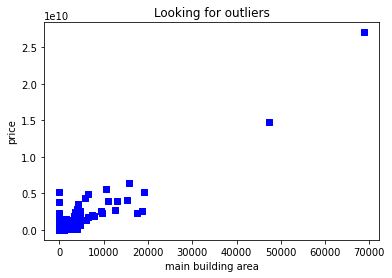

In [ ]:
plt.scatter(df2['main building area'], df2['price'], c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("main building area")
plt.ylabel("price")
plt.show()

df2 = df2[df2['main building area'] < 25000]

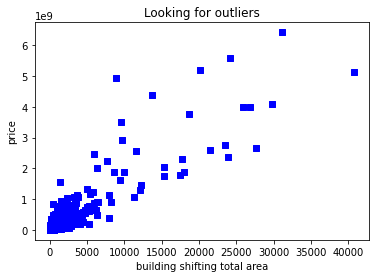

In [ ]:
plt.scatter(df2['building shifting total area'], df2['price'], c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("building shifting total area")
plt.ylabel("price")
plt.show()

In [ ]:
# polynomials of the top 10 existing features
# df['main building area-2'] = df['main building area'] ** 2
# df['main building area-3'] = df['main building area'] ** 3
# df['main building area-sq'] = np.sqrt(df['main building area'])
# df['building shifting total area-2'] = df['building shifting total area'] ** 2
# df['building shifting total area-3'] = df['building shifting total area'] ** 3
# df['building shifting total area-sq'] = np.sqrt(df['building shifting total area'])
# df['land shifting total area sqm-2'] = df['land shifting total area sqm'] ** 2
# df['land shifting total area sqm-3'] = df['land shifting total area sqm'] ** 3
# df['land shifting total area sqm-sq'] = np.sqrt(df['land shifting total area sqm'])
# df['balcony area-2'] = df['balcony area'] ** 2
# df['balcony area-3'] = df['balcony area'] ** 3
# df['balcony area-sq'] = np.sqrt(df['balcony area'])
# df['transaction parking units-2'] = df['transaction parking units'] ** 2
# df['transaction parking units-3'] = df['transaction parking units'] ** 3
# df['transaction parking units-sq'] = np.sqrt(df['transaction parking units'])
# df['transaction building units-2'] = df['transaction building units'] ** 2
# df['transaction building units-3'] = df['transaction building units'] ** 3
# df['transaction building units-sq'] = np.sqrt(df['transaction building units'])
# df['parking sqm-2'] = df['parking sqm'] ** 2
# df['parking sqm-3'] = df['parking sqm'] ** 3
# df['parking sqm-sq'] = np.sqrt(df['parking sqm'])
# df['ancilliary building area-2'] = df['ancilliary building area'] ** 2
# df['ancilliary building area-3'] = df['ancilliary building area'] ** 3
# df['ancilliary building area-sq'] = np.sqrt(df['ancilliary building area'])
# df['building floor total-2'] = df['building floor total'] ** 2
# df['building floor total-3'] = df['building floor total'] ** 3
# df['building floor total-sq'] = np.sqrt(df['building floor total'])
# df['transaction land units-2'] = df['transaction land units'] ** 2
# df['transaction land units-3'] = df['transaction land units'] ** 3
# df['transaction land units-sq'] = np.sqrt(df['transaction land units'])

In [ ]:
# keep top 10 numerical based on correlation. parking spot price removed b/c of overlap with parking sqm and 
# how bargaining may affect the pricing.
categorical_features = df2.select_dtypes(include = ["object"]).columns
numerical_features = df2.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop(['transaction date', 'build date', 'price'])
numerical_features = numerical_features.drop(['parking spot price'])

In [ ]:
numerical_features

Index(['land shifting total area sqm', 'building floor total',
       'building shifting total area', 'building situation - room',
       'building situation - hall', 'building situation - bath', 'parking sqm',
       'main building area', 'ancilliary building area', 'balcony area',
       'transaction land units', 'transaction building units',
       'transaction parking units', 'build year'],
      dtype='object')

In [ ]:
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
df_num = df2[numerical_features]
df_cat = df2[categorical_features]

Numerical features : 14
Categorical features : 8


In [ ]:
# # Log transform of the skewed numerical features to lessen impact of outliers
# # Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# # As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
# skewness = df_num.apply(lambda x: skew(x))
# skewness = skewness[abs(skewness) > 0.5]
# print(str(skewness.shape[0]) + " skewed numerical features to log transform")
# skewed_features = skewness.index
# df_num[skewed_features] = np.log1p(df_num[skewed_features])

In [ ]:
# df_num[skewed_features]

In [ ]:
# Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features in train : " + str(df_cat.isnull().values.sum()))
df_cat = pd.get_dummies(df_cat)
print("Remaining NAs for categorical features in train : " + str(df_cat.isnull().values.sum()))

NAs for categorical features in train : 0
Remaining NAs for categorical features in train : 0


In [ ]:
# Log transform the target for official scoring
# to reverse log1p, use np.expm1(df.price)
#df2.price = np.log1p(df.price)
y = df2.price


Modeling

In [ ]:
# Join categorical and numerical features
train = pd.concat([df_num, df_cat], axis = 1)
print("New number of features : " + str(train.shape[1]))

# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

New number of features : 115
X_train : (71765, 115)
X_test : (30757, 115)
y_train : (71765,)
y_test : (30757,)


In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8357126355620909

In [ ]:
# model = Ridge()
# parameters = {'alpha':[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]}
# cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
# ridge = GridSearchCV(model, parameters, cv=cv, return_train_score=False)
# ridge.fit(X_train, y_train)
# print(ridge.best_params_)
# print(ridge.best_score_)

In [ ]:
# best_ridge_model = ridge.best_estimator_
# best_ridge_model.fit(X_train, y_train)
# best_ridge_model.score(X_test, y_test)

In [ ]:
# model = Lasso()
# parameters = {'alpha':[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60], 
#               'selection': ['random', 'cyclic'], 
#               'max_iter':[5000]}
# cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
# lasso = GridSearchCV(model, parameters, cv=cv, return_train_score=False)
# lasso.fit(X_train, y_train)
# print(lasso.best_params_)
# print(lasso.best_score_)

In [ ]:
# best_lasso_model = lasso.best_estimator_
# best_lasso_model.fit(X_train, y_train)
# best_lasso_model.score(X_test, y_test)

In [ ]:
# model = ElasticNet()
# parameters = {'alpha':[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60], 
#               'l1_ratio': [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
#               'max_iter':[5000]}
# cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
# enet = GridSearchCV(model, parameters, cv=cv, return_train_score=False)
# enet.fit(X_train, y_train)
# print(enet.best_params_)
# print(enet.best_score_)

In [ ]:
# best_enet_model = enet.best_estimator_
# best_enet_model.fit(X_train, y_train)
# best_enet_model.score(X_test, y_test)

Ridge seems to be the best model out of the 4
- only slightly better than linear Regression though.

In [ ]:
# # Plot important coefficients
# coefs = pd.Series(best_ridge_model.coef_, index = X_train.columns)
# print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
#       str(sum(coefs == 0)) + " features")
# imp_coefs = pd.concat([coefs.sort_values().head(10),
#                      coefs.sort_values().tail(10)])
# imp_coefs.plot(kind = "barh")
# plt.title("Coefficients in the Ridge Model")
# plt.show()

In [ ]:
# # Plot important coefficients
# coefs = pd.Series(best_lasso_model.coef_, index = X_train.columns)
# print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
#       str(sum(coefs == 0)) + " features")
# imp_coefs = pd.concat([coefs.sort_values().head(10),
#                      coefs.sort_values().tail(10)])
# imp_coefs.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model")
# plt.show()

In [ ]:
# # Plot important coefficients
# coefs = pd.Series(best_enet_model.coef_, index = X_train.columns)
# print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
# imp_coefs = pd.concat([coefs.sort_values().head(10),
#                      coefs.sort_values().tail(10)])
# imp_coefs.plot(kind = "barh")
# plt.title("Coefficients in the ElasticNet Model")
# plt.show()

In [ ]:
 np.where(train.columns== 'district_Daan District')[0][0]

15

In [ ]:
def predict_price(lstasqm, floortotal, bsta, bsr, bsh, bsb, parksqm, mainba, ancba, balc, tlu, tbu, tpu, by,
                  district, transtype, zoning, floor, buildingstate, materials, bsc, manage):
  district_index = np.where(train.columns == district)[0][0]
  transtype_index = np.where(train.columns == transtype)[0][0]
  zoning_index = np.where(train.columns == zoning)[0][0]
  floor_index = np.where(train.columns == floor)[0][0]
  bs_index = np.where(train.columns == buildingstate)[0][0]
  materials_index = np.where(train.columns == materials)[0][0]
  bsc_index = np.where(train.columns == bsc)[0][0]
  manage_index = np.where(train.columns == manage)[0][0]
  
  x = np.zeros(len(train.columns))
  x[0] = lstasqm
  x[1] = floortotal
  x[2] = bsta
  x[3] = bsr
  x[4] = bsh
  x[5] = bsb
  x[6] = parksqm
  x[7] = mainba
  x[8] = ancba
  x[9] = balc
  x[10] = tlu
  x[11] = tbu
  x[12] = tpu
  x[13] = by

  #setting district_index = 1
  if district_index >= 0:
    x[district_index] = 1
  if transtype_index >= 0:
    x[transtype_index] = 1
  if zoning_index >= 0:
    x[zoning_index] = 1
  if floor_index >= 0:
    x[floor_index] = 1
  if bs_index >= 0:
    x[bs_index] = 1
  if materials_index >= 0:
    x[materials_index] = 1
  if bsc_index >= 0:
    x[bsc_index] = 1
  if manage_index >= 0:
    x[manage_index] = 1

  return lr_clf.predict([x])[0]

    
  

In [ ]:
predict_price(8.65, 13, 41, 1, 1, 1, 0, 26, 0.7, 0, 1, 1, 0, 2020, 
              'district_Wenshan District', 'transaction type_land and building', 'zoning_urban:other', 'floor_8', 
              'building state_Apartment (within 10F w/ Elevator)', 'main building materials_SRC', 'building situation - compartment_Yes', 'management committee_Yes')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


3527355.489949882

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102522 entries, 0 to 106897
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   land shifting total area sqm  102522 non-null  float64
 1   building floor total          102522 non-null  int64  
 2   building shifting total area  102522 non-null  float64
 3   building situation - room     102522 non-null  int64  
 4   building situation - hall     102522 non-null  int64  
 5   building situation - bath     102522 non-null  int64  
 6   parking sqm                   102522 non-null  float64
 7   main building area            102522 non-null  float64
 8   ancilliary building area      102522 non-null  float64
 9   balcony area                  102522 non-null  float64
 10  transaction land units        102522 non-null  int64  
 11  transaction building units    102522 non-null  int64  
 12  transaction parking units     102522 non-nul

Linear Regression with Lasso (L1 Penalty)
- Least Absolute Shrinkage and Selection Operator
- alternative regularization method, simply replace square of weights by sum of absolute value of weights.
- In contrast to L2 regularization, L1 regularization yields sparse feature vectors : most feature weights will be zero. Sparsity can be useful in practice if we have a high dimensional dataset with many features that are irrelevant.

RMSE isn't better than ridge but it's fairly close. Lasso only used 50 features (compared to 140 ish for Ridge). Seems to give bigger weight to districts both in positive and negative. Makes sense intuitively.

Linear Regression with ElasticNet regularization (L1 and L2 penalty)
- compromise between ridge and lasso regression. 
- has L1 penalty to generate sparsity and L2 penalty to overcome some of the limitations of lasso, such as number of variables (lasso can't select more features than it has observations)

In [ ]:
# model export
import pickle
with open('tw_home_price_model.pickle', 'wb') as f:
  pickle.dump(lr_clf, f)

In [ ]:
# column exports
import json
columns = {
    'data_columns' : [col.lower() for col in train.columns]
}
with open('columns.json', 'w') as f:
  f.write(json.dumps(columns))

In [ ]:
#df.to_csv("test.csv")

In [ ]:
a = [0, 1, 2, 3, 4, 5, 6, 7, 8]
a[0:3]

[0, 1, 2]